In [1]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
from FCorrelación_parcial import lcorr

importing Jupyter notebook from FCorrelación_parcial.ipynb


    Correlación discreta
    (a) correlación cruzada 
    (b) correlación parcial


Mide la similitud entre dos señales.
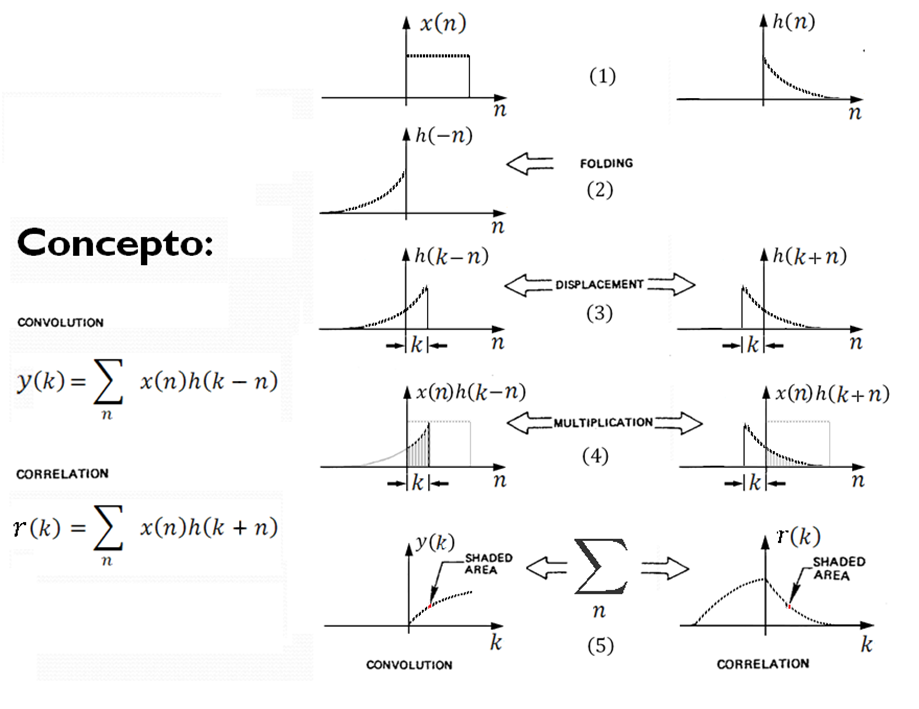

### La diferencia entre la Convolución y la Correlación es que la Correlación tiene solo 4 pasos y no existe el plegado de la función.

- - -

### Correlación Discreta

### Ejercicio Nº1: Encuentra la correlación entre x y h donde x = [1, 2] y h = [2, 1, 1, 1]

In [2]:
nx = np.arange(-5,6)
x = lambda nx: np.piecewise(nx,[(nx>=0)&(nx<2)],[lambda nx: np.array([1,2]), lambda nx: 0])
nh = np.arange(-5,6)
h = lambda nh: np.piecewise(nh,[(nh>=0)&(nh<4)],[lambda nh: np.array([2,1,1,1]), lambda nh: 0])

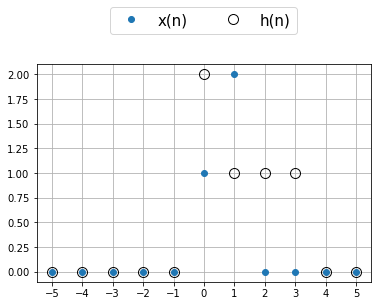

In [3]:
plt.plot(figsize=(10,4))
plt.plot(nx,x(nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.xticks(nx)
plt.legend(('x(n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)
plt.show()

### Recordar:
### j es un contador o índice que recorre los arreglos y x(nx) es el vector que se desplaza.

In [4]:
j = np.arange(len(nx)) #nx=nh

In [5]:
j

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

### r(k) = correlación (x(k+n), h(n)) 
k: cantidad de unidades que nos desplazamos.

La correlación es no conmutativa. El SEGUNDO vector es el que se mantiene fijo y el PRIMERO se desplaza.

### (1) ¿Para que valor de nr inicia la correlación?

nr: eje x de la correlación

### nr0 = nx0 - nhf , 

nr0 valor inicial

nx0 - inicial

nhf - final

### Cuando x(k+n) se desplaza hacia la derecha, estos desplazamientos implican valores negativos para k (k<0). 
### Se cuenta desde el comienzo de x (corresponde a j=0) hasta el final de h (corresponde al último valor de j -> j=10).

### La correlación inicia en:

In [6]:
#LA CORRELACIÓN INICIA EN:

nx[0], nh[len(nh)-1], nx[0] - nh[len(nh)-1]

(-5, 5, -10)

### ¿Cuál es el primer valor no nulo de la correlación?

In [7]:
#PRIMER VALOR NO NULO DE LA CORRELACIÓN:

nx[5], nh[8], nx[5] - nh[8]

# Primer valor no nulo de X -> nx[5]
# Último valor no nulo de H -> nh[8]
# Primer valor no nulo de la CORRELACIÓN -> nx[5] - nh[8]

(0, 3, -3)

Hay que mover -3 para que este el primer valor no nulo de correlación.

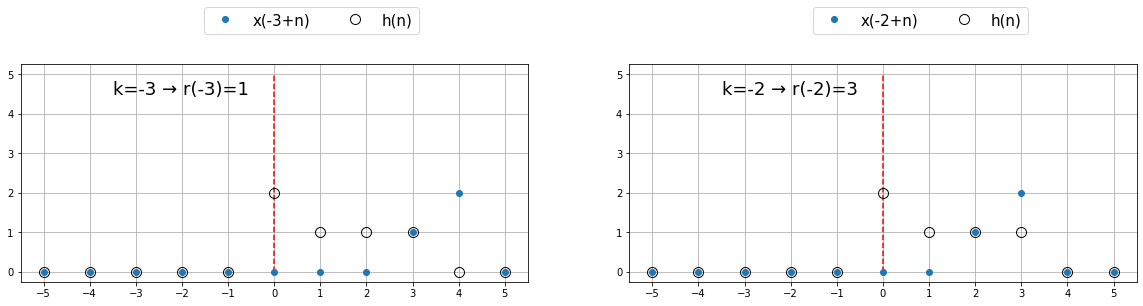

In [8]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.plot(nx,x(-3+nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.vlines(0,0,5,'r',linestyles='dashed')
plt.text(-3.5,4.5,s='k=-3 → r(-3)=1',fontsize=18)
plt.xticks(nx)
plt.legend(('x(-3+n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)


plt.subplot(122)
plt.plot(nx,x(-2+nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.vlines(0,0,5,'r',linestyles='dashed')
plt.text(-3.5,4.5,s='k=-2 → r(-2)=3',fontsize=18)
plt.xticks(nx)
plt.legend(('x(-2+n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)
plt.show()

Si desplazo 3 hay un solo punto de contacto.

Si desplazo 2 hay dos puntos de contacto.

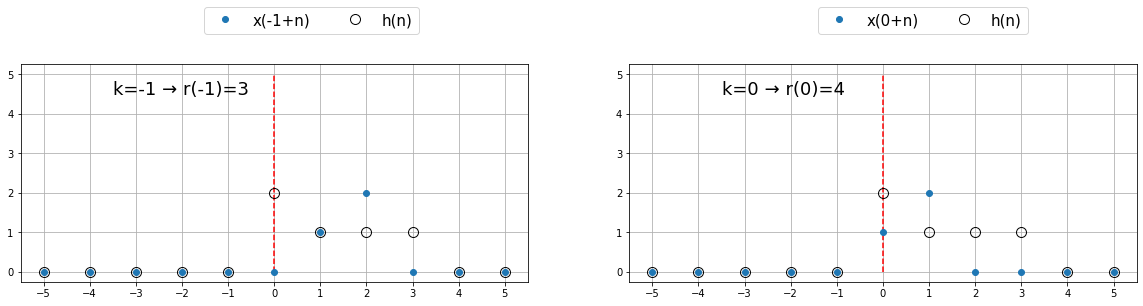

In [9]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.plot(nx,x(-1+nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.vlines(0,0,5,'r',linestyles='dashed')
plt.text(-3.5,4.5,s='k=-1 → r(-1)=3',fontsize=18)
plt.xticks(nx)
plt.legend(('x(-1+n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)


plt.subplot(122)
plt.plot(nx,x(0+nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.vlines(0,0,5,'r',linestyles='dashed')
plt.text(-3.5,4.5,s='k=0 → r(0)=4',fontsize=18)
plt.xticks(nx)
plt.legend(('x(0+n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)
plt.show()

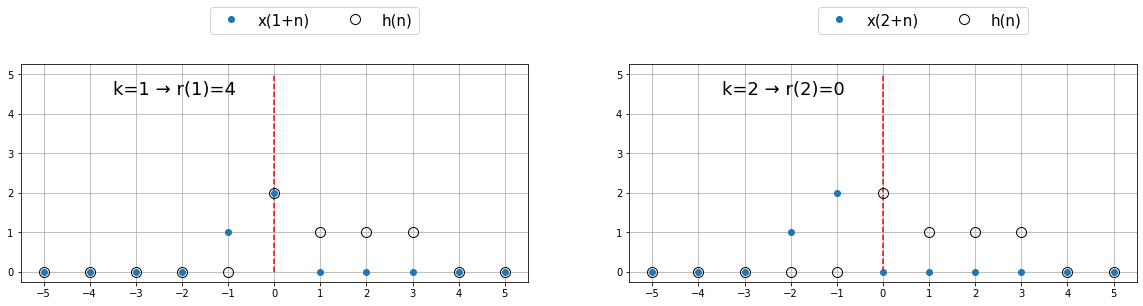

In [10]:
plt.figure(figsize=(20,4))
plt.subplot(121)
plt.plot(nx,x(1+nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.vlines(0,0,5,'r',linestyles='dashed')
plt.text(-3.5,4.5,s='k=1 → r(1)=4',fontsize=18)
plt.xticks(nx)
plt.legend(('x(1+n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)


plt.subplot(122)
plt.plot(nx,x(2+nx),'o',ms=6)
plt.plot(nh,h(nh),'ko',ms=10,mfc='none')
plt.vlines(0,0,5,'r',linestyles='dashed')
plt.text(-3.5,4.5,s='k=2 → r(2)=0',fontsize=18)
plt.xticks(nx)
plt.legend(('x(2+n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)
plt.show()

### Empleamos la función "np.correlate()"

In [11]:
r = np.correlate(x(nx), h(nh),'full') # Calculamos la correlación. h fijo y x móvil
nr0 = nx[0] - nh[len(nh)-1]
Nr = len(nx) + len(nh) -1
nr = np.arange(nr0, nr0 + Nr)

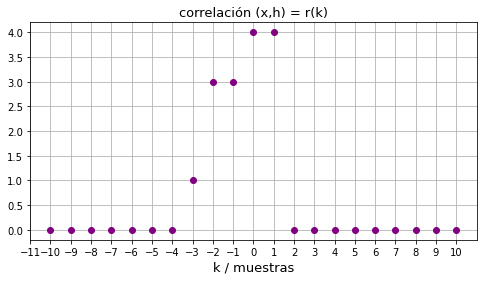

In [12]:
plt.figure(figsize=(8,4))
plt.plot(nr,r,'o',color='purple',ms=6)
plt.xlim(-11,11)
plt.xticks(np.arange(-11,11))
plt.xlabel('k / muestras',fontsize=13)
plt.title('correlación (x,h) = r(k)',fontsize=13)
plt.grid(True)
plt.show()

In [13]:
Nr

21

21 elementos de la correlación. Desde -10 a 10.

- - -

    Tarea: Ejercicio Nº2: Encuentra la correlación entre h y x:

    x -> [ 1 1 1 ]

    h -> [ 5 4 3 2 1 ]
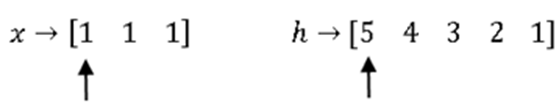

In [14]:
NX = np.arange(-7,10)
X = lambda NX: np.piecewise(NX,[(NX>=0)&(NX<=2)],[lambda NX: 1, lambda NX: 0])
NH = NX
H = lambda NH: np.piecewise(NH,[(NH>=0)&(NH<5)],[lambda NH: 5-NH, lambda nh: 0])

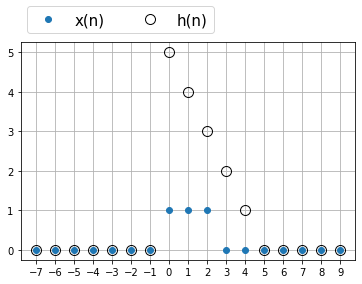

In [15]:
plt.plot(figsize=(10,4))
plt.plot(NX,X(NX),'o',ms=6)
plt.plot(NH,H(NH),'ko',ms=10,mfc='none')
plt.xticks(NX)
plt.legend(('x(n)','h(n)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.6,1.2))
plt.grid(True)
plt.show()

In [16]:
R = np.correlate(X(NX), H(NH),'full') # Calculamos la correlación. h fijo y x móvil
NR0 = NX[0] - NH[len(NH)-1]
NR = len(NX) + len(NX) -1
n_r = np.arange(NR0, NR0 + NR)

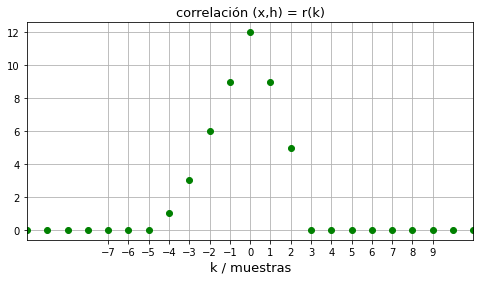

In [17]:
plt.figure(figsize=(8,4))
plt.plot(n_r,R,'o',color='green',ms=6)
plt.xlim(-11,11)
plt.xticks(np.arange(-7,10))
plt.xlabel('k / muestras',fontsize=13)
plt.title('correlación (x,h) = r(k)',fontsize=13)
plt.grid(True)
plt.show()

- - -

### Correlación parcial

### (1) Es una versión de la r(x,h) que resta las medias y normaliza el vector de salida dividiéndolo por el producto de la longitud de los vectores por los desvíos estandar de los mismos. 
### (2) Los vectores x y h deben tener la misma longitud. 
### (3) El vector R(k) tiene la misma cantidad de elementos que x y h. 
### (4) El primer elemento de r es r(0) que corresponde al caso en que x y h están superpuestos. 
### (5) La autocorrelación de un vector es la correlación del vector consigo mismo.

R = np.correlate (x - np.mean (x) , h - np.mean (h) , "full") / len (x) * np.std (x) * np.std (h)
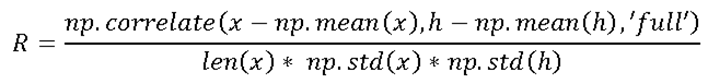

- - -

### Ejemplo Nº3: Encuentra la correlación parcial R entre x y h

    x = [0,2,-2,1,-1]

    h = [5,4,3,2,1]
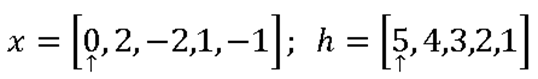

In [18]:
N = 5
nx = np.arange(N)
x = np.array([0,2,-2,1,-1])
nh = nx
h = np.array([5,4,3,2,1])

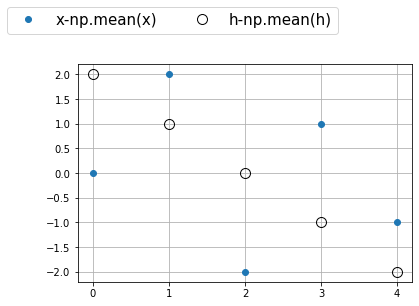

In [19]:
plt.plot(figsize=(10,4))
plt.plot(nx,x-np.mean(x),'o',ms=6) #np.mean (x) es la media
plt.plot(nh,h-np.mean(h),'ko',ms=10,mfc='none') #np.mean (h) es la media
plt.xticks(nx)
plt.legend(('x-np.mean(x)','h-np.mean(h)'),prop={'size':15},ncol=2,bbox_to_anchor=(0.8,1.3))
plt.grid(True)
plt.show()

In [20]:
R = lcorr(x,h) #Correlación Parcial
R.shape

(5, 2)

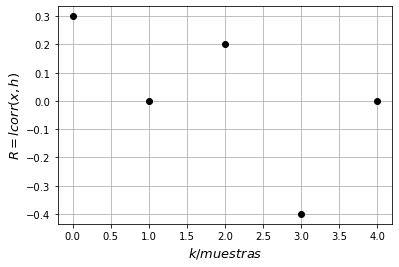

In [21]:
plt.plot(figsize=(4,4))
plt.plot(R[:,0],R[:,1],'o',color='k',ms=6)
plt.xlabel('$k / muestras$',fontsize=13)
plt.ylabel('$R=lcorr(x,h)$',fontsize=13)
plt.grid(True)
plt.show()

- - -

### Usos de la correlación:
### (1) Encontrar similitud entre señales. 

### (2) Detección de objetos. 

### (3) Aumentar la SR(dB) del espectro de señales ruidosas.

### (4) Para la detección de fallas de sistemas mecánicos por medio de la PSD (Transformada de Fourier -TD- de autocorrelación).

### (5) Etc.

- - -

### Ejemplo de uso de correlación para la detección de objetos.
### Modelamos la señal de prueba:

In [29]:
N, F, Fs = 1000, 2, 200
n = np.arange(N,dtype=float)
z = np.piecewise(n,[n<=200],[lambda n: 3*np.sin(2*np.pi*(F/Fs)*n), lambda n: 0])
w = np.piecewise(n,[n<=200],[lambda n: 0.5-0.5*np.cos(2*np.pi*(1/Fs)*n), lambda n: 0]) #Función de suavizado (Filtros)
x = z*w 

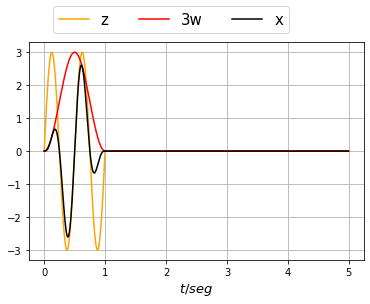

In [31]:
plt.plot(figsize=(8,4))
plt.plot(n/Fs,z,color='orange')
plt.plot(n/Fs,3*w,color='r')
plt.plot(n/Fs,x,color='k')
plt.xlabel('$t/seg$',fontsize=13)
plt.legend(('z','3w','x'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

El pulso es "x", la gráfica en negro.

### Modelamos la señal de retorno: (desfasada, ruidosa y atenuada)

In [33]:
#RUIDO

ruido = np.random.normal(0,0.1,N) # defino el ruido
y = np.ndarray(N,dtype=float) # defino la señal de retorno
for j in np.arange(N):
    if (j>=300)&(j<=500):
        y[j] = ruido[j] + 0.1*x[j-300] #atenuación de 10 veces y desplazada 300 muestras
    else:
        y[j] = ruido[j] # fuera del rango sólo hay ruido

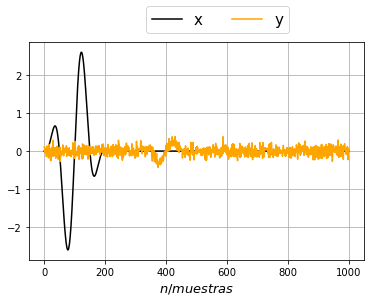

In [35]:
plt.plot(figsize=(8,4))
plt.plot(n,x,color='k')
plt.plot(n,y,color='orange')
plt.xlabel('$n/muestras$',fontsize=13)
plt.legend(('x','y',),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

La negra es señal portadora.

La naranja es la señal de retorno.

In [36]:
#CALCULAMOS CORRELACIÓN

R = lcorr(x,y)

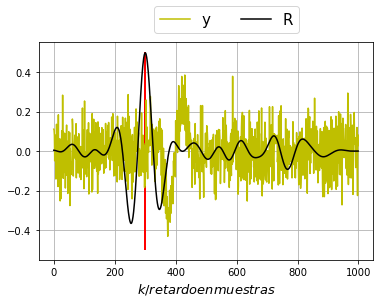

In [37]:
plt.plot(figsize=(4,4))
plt.plot(n,y,color='y')
plt.plot(R[:,0],R[:,1],color='k')
plt.xlabel('$k / retardo en muestras$',fontsize=13)
plt.vlines(301,-0.5,0.5,linewidth=2,color='r')
plt.legend(('y','R'),prop={'size':15},ncol=3,bbox_to_anchor=(0.8,1.2))
plt.grid(True)
plt.show()

In [38]:
np.where(R[:,1] == np.max(R[:,1]))

(array([300]),)

## ESTO ES PARA LA DETECCIÓN DE OBJETOS:

### t = max(R)/Fs. Si la velocidad de propagación de la onda en el medio es v, entonces la distancia desde el objeto al emisor de la señal de prueba será d = v*t/2